In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D

In [2]:
test_data = pd.read_csv("/Users/nusranazar/Desktop/Study Stuff/FALL 24/3920 Project/Dataset/test.csv")
train_data = pd.read_csv("/Users/nusranazar/Desktop/Study Stuff/FALL 24/3920 Project/Dataset/train.csv")

Train Data

In [3]:
train_data

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome


Test Data

In [4]:
test_data

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,PID0x81e1,9,Yes,Yes,NaN,No,4.878335,Francisco,NaN,Artavian,...,Yes,2,Multiple,7.234960,abnormal,False,True,True,True,False
9461,PID0x3514,1,Yes,No,NaN,Yes,4.927151,James,NaN,Nasir,...,No,-99,Singular,4.859536,abnormal,False,True,False,True,True
9462,PID0x5408,2,No,Yes,No,No,4.898352,Rebecca,NaN,Jatorian,...,No,3,-99,5.696062,normal,False,True,False,False,True
9463,PID0x2017,13,No,Yes,No,No,4.804840,Daryl,NaN,Keevis,...,-99,1,Singular,3.000000,inconclusive,True,True,True,True,True


In [5]:
# Remove quotes and replace spaces with underscores
train_data.columns = [col.strip().replace("'", '').replace(' ', '_') for col in train_data.columns]

test_data.columns = [col.strip().replace("'", '').replace(' ', '_') for col in test_data.columns]

In [6]:
train_data.columns

Index(['Patient_Id', 'Patient_Age', 'Genes_in_mothers_side',
       'Inherited_from_father', 'Maternal_gene', 'Paternal_gene',
       'Blood_cell_count_(mcL)', 'Patient_First_Name', 'Family_Name',
       'Fathers_name', 'Mothers_age', 'Fathers_age', 'Institute_Name',
       'Location_of_Institute', 'Status', 'Respiratory_Rate_(breaths/min)',
       'Heart_Rate_(rates/min', 'Test_1', 'Test_2', 'Test_3', 'Test_4',
       'Test_5', 'Parental_consent', 'Follow-up', 'Gender', 'Birth_asphyxia',
       'Autopsy_shows_birth_defect_(if_applicable)', 'Place_of_birth',
       'Folic_acid_details_(peri-conceptional)',
       'H/O_serious_maternal_illness', 'H/O_radiation_exposure_(x-ray)',
       'H/O_substance_abuse', 'Assisted_conception_IVF/ART',
       'History_of_anomalies_in_previous_pregnancies',
       'No._of_previous_abortion', 'Birth_defects',
       'White_Blood_cell_count_(thousand_per_microliter)', 'Blood_test_result',
       'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Sympt

In [7]:
# Drop rows where 'Genetic_Disorder' is NaN
train_data.dropna(subset=['Genetic_Disorder'], inplace=True)

# Reset the index to update row numbers and avoid keeping the old index
train_data.reset_index(drop=True, inplace=True)

Dropping the unnecessary data columns - Based on Optimised Paper

In [8]:
train_data = train_data.drop(columns=['Patient_Id','Patient_First_Name', 'Family_Name',
       'Fathers_name','Institute_Name', 'Place_of_birth',
       'Location_of_Institute', 'Parental_consent', 'Test_1', 'Test_2', 'Test_3', 'Test_4',
       'Test_5', 
       'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5'])

In [9]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Data columns (total 27 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient_Age                                       18712 non-null  float64
 1   Genes_in_mothers_side                             19937 non-null  object 
 2   Inherited_from_father                             19676 non-null  object 
 3   Maternal_gene                                     17513 non-null  object 
 4   Paternal_gene                                     19937 non-null  object 
 5   Blood_cell_count_(mcL)                            19937 non-null  float64
 6   Mothers_age                                       14733 non-null  float64
 7   Fathers_age                                       14772 non-null  float64
 8   Status                                            19937 non-null  object 
 9   Respiratory_Rate_

In [10]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_Age,18712.0,6.973814,4.317123,0.00000,3.000000,7.000000,11.000000,14.000000
Blood_cell_count_(mcL),19937.0,4.899020,0.199268,4.14623,4.763531,4.899875,5.033669,5.609829
Mothers_age,14733.0,34.555691,9.837057,18.00000,26.000000,35.000000,43.000000,51.000000
Fathers_age,14772.0,41.982602,13.038188,20.00000,30.000000,42.000000,53.000000,64.000000
No._of_previous_abortion,18109.0,1.999669,1.411399,0.00000,1.000000,2.000000,3.000000,4.000000
White_Blood_cell_count_(thousand_per_microliter),18088.0,7.482977,2.650108,3.00000,5.429574,7.472366,9.521766,12.000000


In [11]:
train_data.isnull().sum()

Patient_Age                                         1225
Genes_in_mothers_side                                  0
Inherited_from_father                                261
Maternal_gene                                       2424
Paternal_gene                                          0
Blood_cell_count_(mcL)                                 0
Mothers_age                                         5204
Fathers_age                                         5165
Status                                                 0
Respiratory_Rate_(breaths/min)                      1826
Heart_Rate_(rates/min                               1805
Follow-up                                           1862
Gender                                              1844
Birth_asphyxia                                      1848
Autopsy_shows_birth_defect_(if_applicable)          3935
Folic_acid_details_(peri-conceptional)              1814
H/O_serious_maternal_illness                        1824
H/O_radiation_exposure_(x-ray) 

In [12]:
train_data.duplicated().sum()

0

In [13]:
train_data.columns

Index(['Patient_Age', 'Genes_in_mothers_side', 'Inherited_from_father',
       'Maternal_gene', 'Paternal_gene', 'Blood_cell_count_(mcL)',
       'Mothers_age', 'Fathers_age', 'Status',
       'Respiratory_Rate_(breaths/min)', 'Heart_Rate_(rates/min', 'Follow-up',
       'Gender', 'Birth_asphyxia',
       'Autopsy_shows_birth_defect_(if_applicable)',
       'Folic_acid_details_(peri-conceptional)',
       'H/O_serious_maternal_illness', 'H/O_radiation_exposure_(x-ray)',
       'H/O_substance_abuse', 'Assisted_conception_IVF/ART',
       'History_of_anomalies_in_previous_pregnancies',
       'No._of_previous_abortion', 'Birth_defects',
       'White_Blood_cell_count_(thousand_per_microliter)', 'Blood_test_result',
       'Genetic_Disorder', 'Disorder_Subclass'],
      dtype='object')

In [14]:
print(train_data["Genes_in_mothers_side"].value_counts())

Genes_in_mothers_side
Yes    11848
No      8089
Name: count, dtype: int64


In [15]:
print(train_data['Genetic_Disorder'].value_counts())

Genetic_Disorder
Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: count, dtype: int64


In [16]:
def get_unique(train_data):
    for i in train_data.columns:
        print(f'{i} - > {len(train_data[i].unique())}')
get_unique(train_data)

Patient_Age - > 16
Genes_in_mothers_side - > 2
Inherited_from_father - > 3
Maternal_gene - > 3
Paternal_gene - > 2
Blood_cell_count_(mcL) - > 19937
Mothers_age - > 35
Fathers_age - > 46
Status - > 2
Respiratory_Rate_(breaths/min) - > 3
Heart_Rate_(rates/min - > 3
Follow-up - > 3
Gender - > 4
Birth_asphyxia - > 5
Autopsy_shows_birth_defect_(if_applicable) - > 4
Folic_acid_details_(peri-conceptional) - > 3
H/O_serious_maternal_illness - > 3
H/O_radiation_exposure_(x-ray) - > 5
H/O_substance_abuse - > 5
Assisted_conception_IVF/ART - > 3
History_of_anomalies_in_previous_pregnancies - > 3
No._of_previous_abortion - > 6
Birth_defects - > 3
White_Blood_cell_count_(thousand_per_microliter) - > 15682
Blood_test_result - > 5
Genetic_Disorder - > 3
Disorder_Subclass - > 10


In [17]:
# Continuous features with median imputation
train_data['Patient_Age'].fillna(train_data['Patient_Age'].median(), inplace=True)
train_data['Blood_cell_count_(mcL)'].fillna(train_data['Blood_cell_count_(mcL)'].median(), inplace=True)
train_data['White_Blood_cell_count_(thousand_per_microliter)'].fillna(train_data['White_Blood_cell_count_(thousand_per_microliter)'].median(), inplace=True)

# Categorical/ordinal features with mode imputation
columns_to_fill_mode = [
    'Genes_in_mothers_side', 'Inherited_from_father', 'Maternal_gene', 'Paternal_gene','Mothers_age',
    'Fathers_age','Status', 'Respiratory_Rate_(breaths/min)', 'Heart_Rate_(rates/min', 
    'Follow-up', 'Gender', 'Birth_asphyxia','Autopsy_shows_birth_defect_(if_applicable)',  
    'Folic_acid_details_(peri-conceptional)', 
    'H/O_serious_maternal_illness', 'H/O_radiation_exposure_(x-ray)', 
    'H/O_substance_abuse', 'Assisted_conception_IVF/ART', 
    'History_of_anomalies_in_previous_pregnancies','No._of_previous_abortion', 'Birth_defects', 
    'Blood_test_result', 'Disorder_Subclass'
]

for col in columns_to_fill_mode:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)



In [18]:
train_data.isnull().sum()

Patient_Age                                         0
Genes_in_mothers_side                               0
Inherited_from_father                               0
Maternal_gene                                       0
Paternal_gene                                       0
Blood_cell_count_(mcL)                              0
Mothers_age                                         0
Fathers_age                                         0
Status                                              0
Respiratory_Rate_(breaths/min)                      0
Heart_Rate_(rates/min                               0
Follow-up                                           0
Gender                                              0
Birth_asphyxia                                      0
Autopsy_shows_birth_defect_(if_applicable)          0
Folic_acid_details_(peri-conceptional)              0
H/O_serious_maternal_illness                        0
H/O_radiation_exposure_(x-ray)                      0
H/O_substance_abuse         

In [19]:
print("Status: ",train_data["Status"].unique())
print("Respiratory Rate (breaths/min): ",train_data["Respiratory_Rate_(breaths/min)"].unique())
print("Heart Rate (rates/min: ",train_data["Heart_Rate_(rates/min"].unique())
print("Follow-up: ",train_data["Follow-up"].unique())
print("Gender: ",train_data["Gender"].unique())
print("Autopsy shows birth defect (if applicable): ",train_data["Autopsy_shows_birth_defect_(if_applicable)"].unique())
print("Birth defects: ",train_data["Birth_defects"].unique())
print("Blood test result: ",train_data["Blood_test_result"].unique())
print("Genetic Disorder: ",train_data["Genetic_Disorder"].unique())
print("Disorder Subclass: ",train_data["Disorder_Subclass"].unique())

Status:  ['Alive' 'Deceased']
Respiratory Rate (breaths/min):  ['Normal (30-60)' 'Tachypnea']
Heart Rate (rates/min:  ['Normal' 'Tachycardia']
Follow-up:  ['High' 'Low']
Gender:  ['Ambiguous' 'Male' 'Female']
Autopsy shows birth defect (if applicable):  ['Not applicable' 'No' 'Yes']
Birth defects:  ['Multiple' 'Singular']
Blood test result:  ['slightly abnormal' 'normal' 'inconclusive' 'abnormal']
Genetic Disorder:  ['Mitochondrial genetic inheritance disorders'
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
Disorder Subclass:  ["Leber's hereditary optic neuropathy" 'Diabetes' 'Leigh syndrome'
 'Cancer' 'Cystic fibrosis' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' "Alzheimer's"]


# EDA

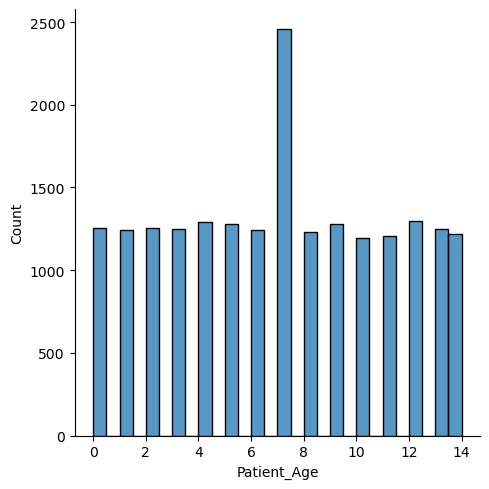

In [21]:
#plt.style.use('seaborn-dark')
sns.displot(x = 'Patient_Age', data = train_data);

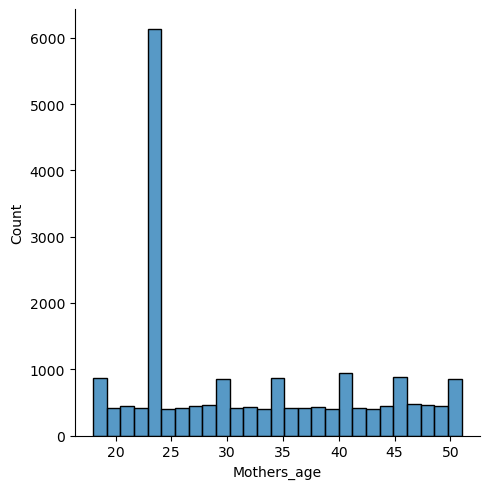

In [22]:
sns.displot(x = 'Mothers_age', data = train_data);

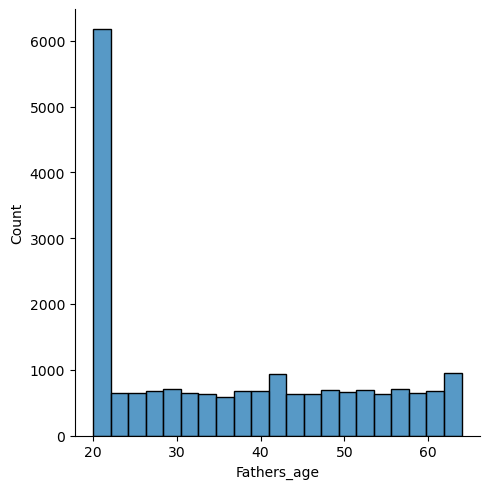

In [23]:
sns.displot(x = 'Fathers_age', data = train_data);

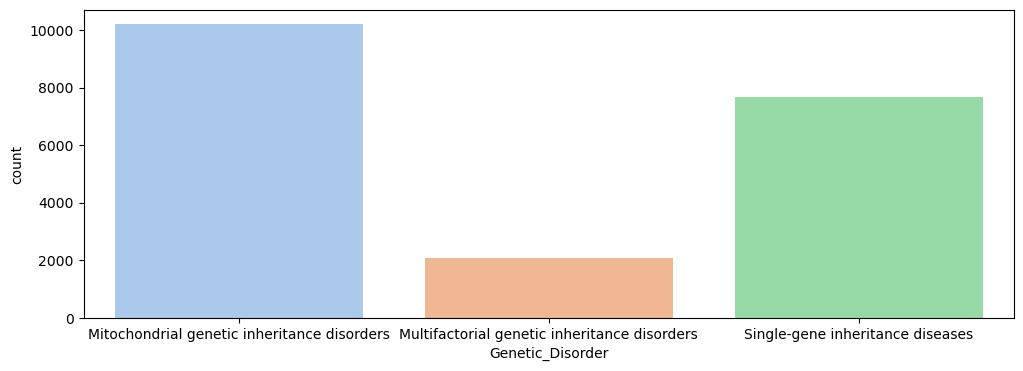

In [24]:

plt.figure(figsize=(12, 4))
sns.countplot(x = 'Genetic_Disorder', data = train_data,palette='pastel');

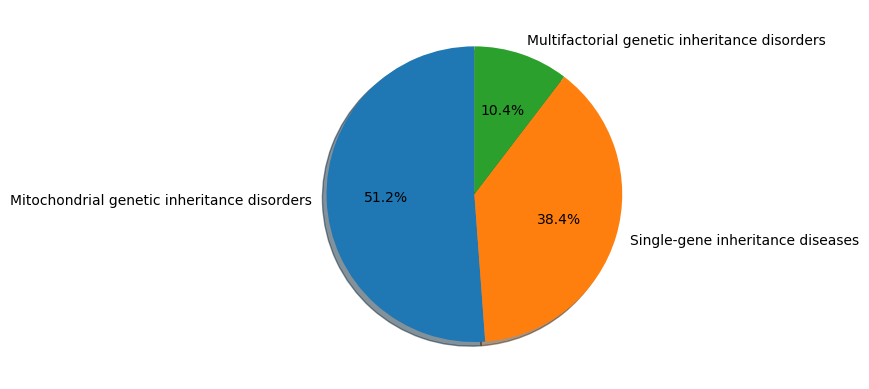

In [25]:
labels1 = 'Mitochondrial genetic inheritance disorders', 'Single-gene inheritance diseases', 'Multifactorial genetic inheritance disorders'
explode1 = (0, 0, 0)


plt.pie(train_data.Genetic_Disorder.value_counts(), explode=explode1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90);

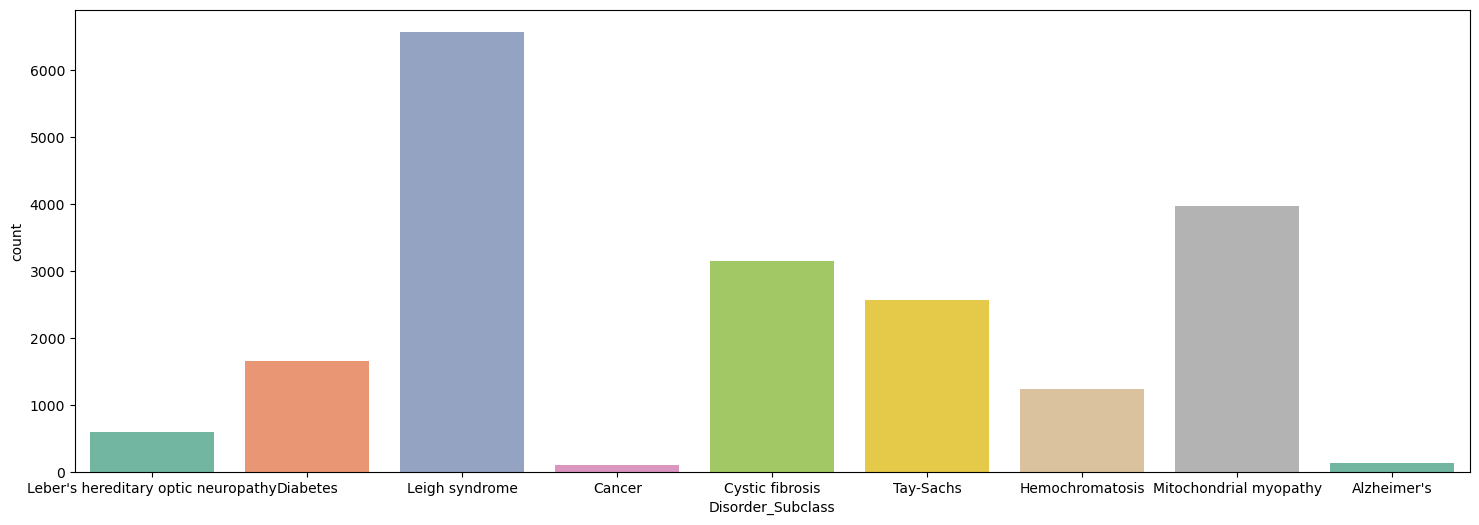

In [26]:
plt.figure(figsize=(18, 6))
sns.countplot(x = 'Disorder_Subclass', data = train_data, palette='Set2');

In [39]:
unique_subclasses = train_data.Disorder_Subclass.value_counts()
print(unique_subclasses)

Disorder_Subclass
Leigh syndrome                         6573
Mitochondrial myopathy                 3971
Cystic fibrosis                        3145
Tay-Sachs                              2556
Diabetes                               1653
Hemochromatosis                        1228
Leber's hereditary optic neuropathy     587
Alzheimer's                             133
Cancer                                   91
Name: count, dtype: int64


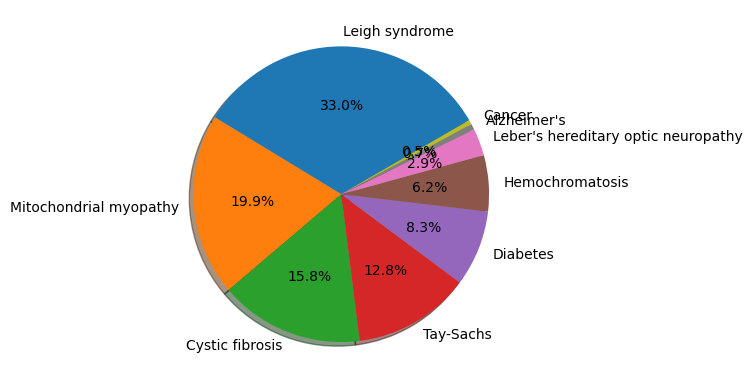

In [38]:

labels2 = ['Leigh syndrome', 'Mitochondrial myopathy', 'Cystic fibrosis', 'Tay-Sachs', 'Diabetes', 'Hemochromatosis',
"Leber's hereditary optic neuropathy", "Alzheimer's", 'Cancer']

explode2 = (0, 0, 0, 0, 0, 0, 0, 0,0)

plt.pie(train_data.Disorder_Subclass.value_counts(), explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=30);

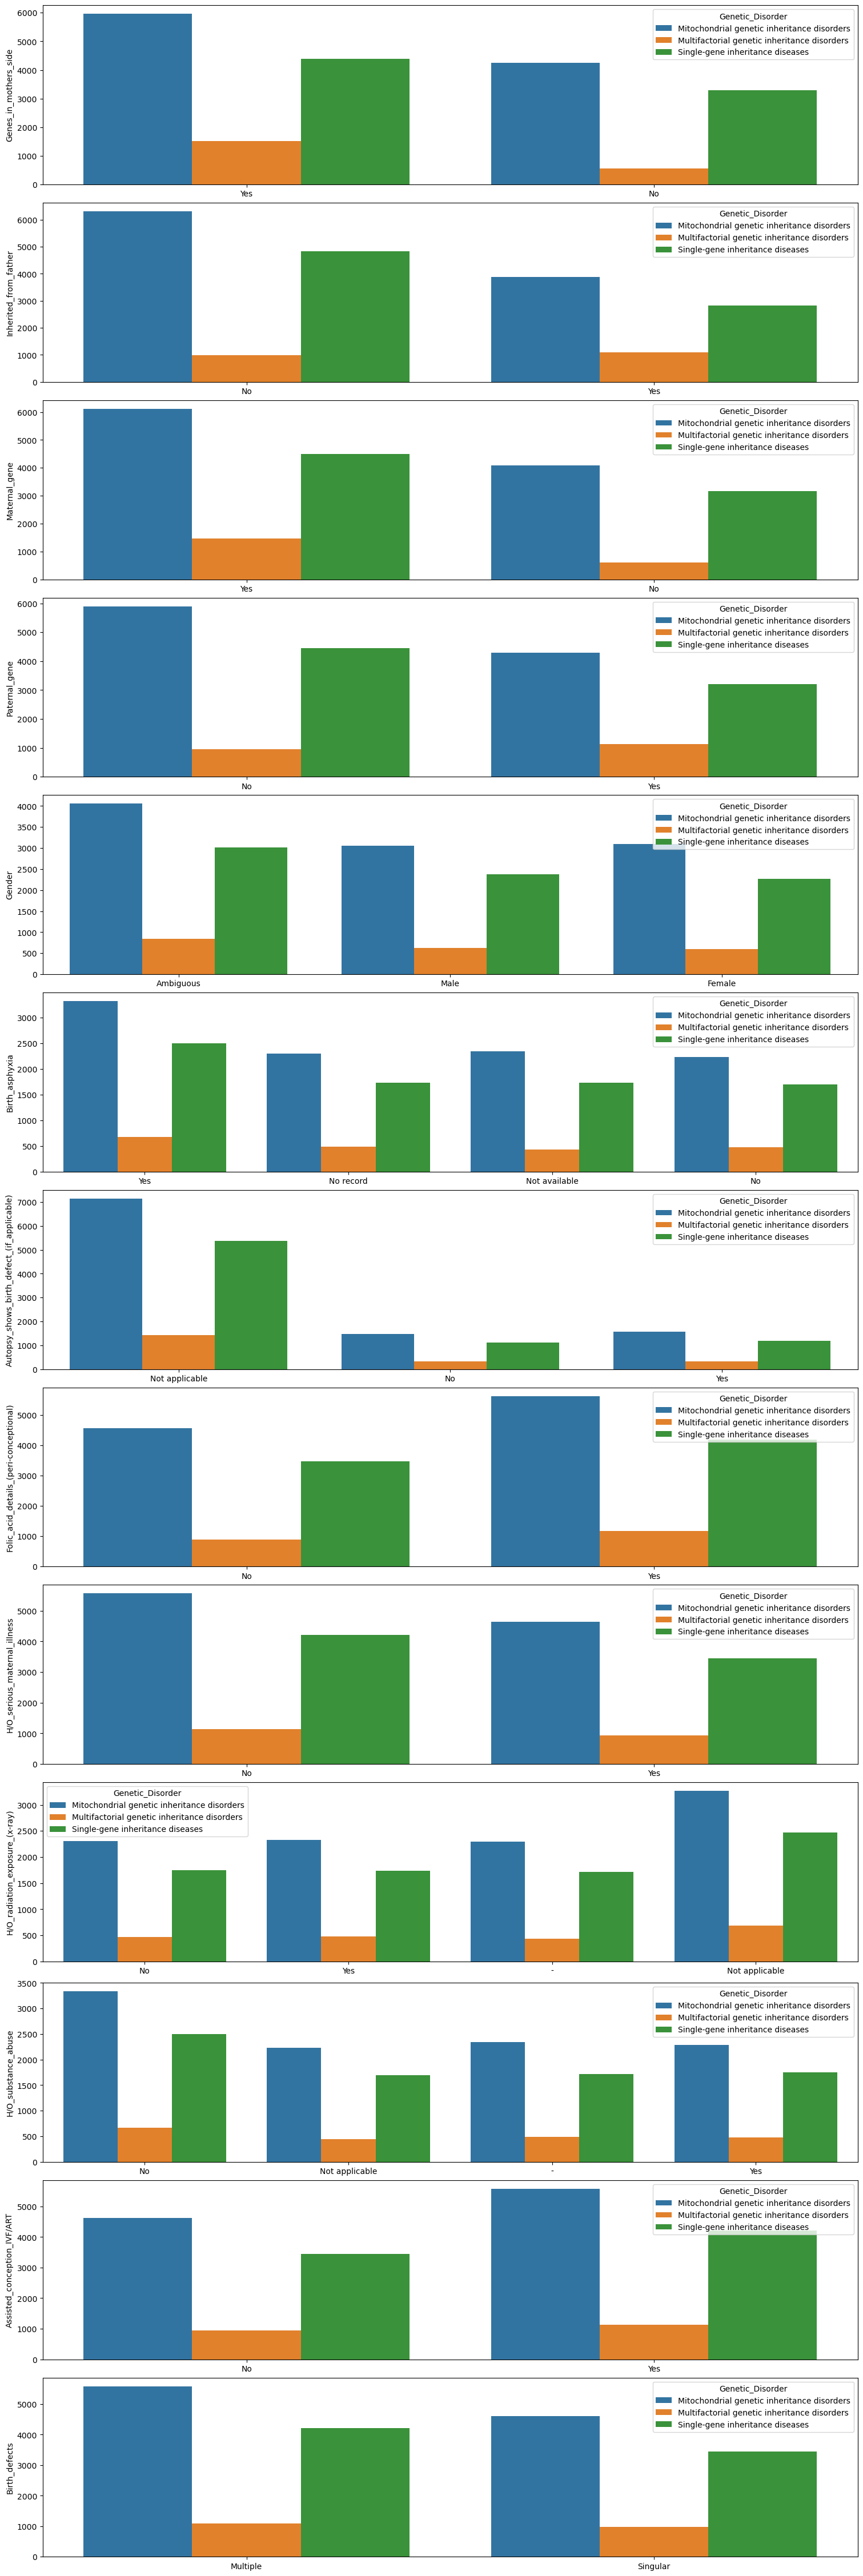

In [40]:
cols  = ['Genes_in_mothers_side', 'Inherited_from_father', 'Maternal_gene', 'Paternal_gene', 
          'Gender', 'Birth_asphyxia', 'Autopsy_shows_birth_defect_(if_applicable)', 
         'Folic_acid_details_(peri-conceptional)',
        'H/O_serious_maternal_illness',
         'H/O_radiation_exposure_(x-ray)', 'H/O_substance_abuse', 'Assisted_conception_IVF/ART', 'Birth_defects']


fig, ax = plt.subplots(len(cols),  figsize = (15, 45), constrained_layout = True)

for i, var in enumerate(cols): 
    sns.countplot(data = train_data, x = var, hue = 'Genetic_Disorder', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

Unique values in 'Genetic_Disorder': ['Mitochondrial genetic inheritance disorders'
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
Unique values in 'Genetic_Disorder' after encoding: [0 1 2]


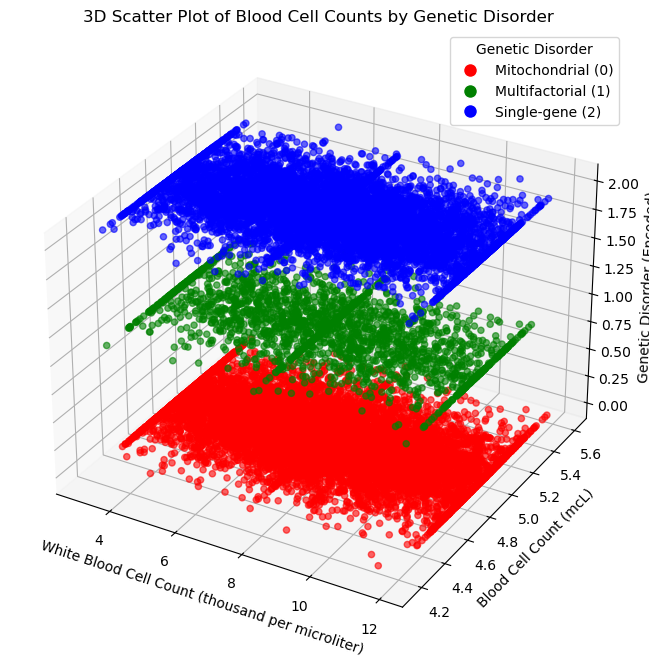

In [42]:
# Check unique values in the 'Genetic_Disorder' column
print("Unique values in 'Genetic_Disorder':", train_data['Genetic_Disorder'].unique())

# Update the disorder mapping with all unique values from your dataset
disorder_mapping = {
    'Mitochondrial genetic inheritance disorders': 0,
    'Multifactorial genetic inheritance disorders': 1,
    'Single-gene inheritance diseases': 2
}

# Replace the values in the Genetic_Disorder column
train_data['Genetic_Disorder'] = train_data['Genetic_Disorder'].replace(disorder_mapping)

# Check for any remaining non-numeric values in 'Genetic_Disorder'
print("Unique values in 'Genetic_Disorder' after encoding:", train_data['Genetic_Disorder'].unique())

# Drop any rows where 'White_Blood_cell_count_(thousand_per_microliter)' or 'Blood_cell_count_(mcL)' are NaN
train_data = train_data.dropna(subset=['White_Blood_cell_count_(thousand_per_microliter)', 'Blood_cell_count_(mcL)', 'Genetic_Disorder'])

# Ensure Genetic_Disorder is of integer type for plotting
train_data['Genetic_Disorder'] = train_data['Genetic_Disorder'].astype(int)

# Create a figure and a 3D subplot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for different Genetic_Disorder categories
colors = {0: 'r', 1: 'g', 2: 'b'}

# Create the 3D scatter plot
ax.scatter(
    train_data['White_Blood_cell_count_(thousand_per_microliter)'],
    train_data['Blood_cell_count_(mcL)'],
    train_data['Genetic_Disorder'],
    c=train_data['Genetic_Disorder'].map(colors),
    alpha=0.6
)

# Setting labels and title
ax.set_xlabel('White Blood Cell Count (thousand per microliter)')
ax.set_ylabel('Blood Cell Count (mcL)')
ax.set_zlabel('Genetic Disorder (Encoded)')
ax.set_title('3D Scatter Plot of Blood Cell Counts by Genetic Disorder')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in colors.values()]
labels = ['Mitochondrial (0)', 'Multifactorial (1)', 'Single-gene (2)']
ax.legend(handles, labels, title='Genetic Disorder')

# Show the plot
plt.show()
